In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [57]:
# 컬러 영상(256 x 256)
image = cv2.imread('C:/Users/no2pe/Desktop/bad_pump.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(256,256))

Text(0.5, 1.0, 'Sharp Image')

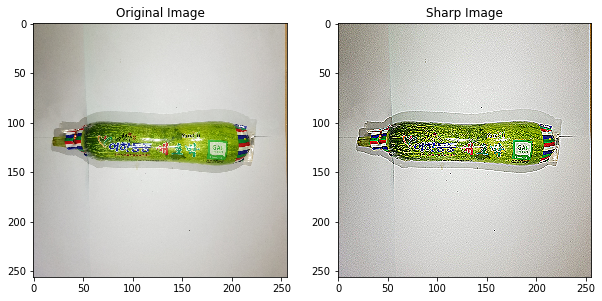

In [52]:
# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
image_sharp = cv2.filter2D(image, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp, cmap='gray')
ax[1].set_title('Sharp Image')

Text(0.5, 1.0, 'Sharp Image')

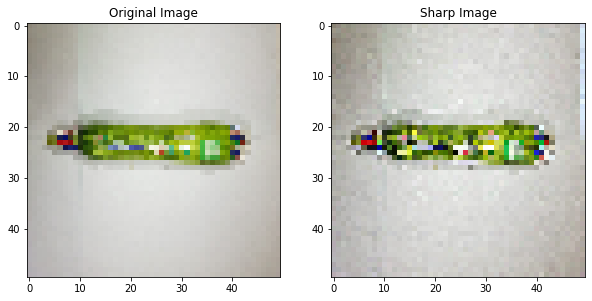

In [82]:
image = cv2.resize(image,(50,50))
image_sharp = cv2.resize(image_sharp,(50,50))

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp, cmap='gray')
ax[1].set_title('Sharp Image')

In [54]:
# 흑백영상(256x256)
image = cv2.imread('C:/Users/no2pe/Desktop/bad_pump.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,(256,256))

Text(0.5, 1.0, 'Enhanced Image')

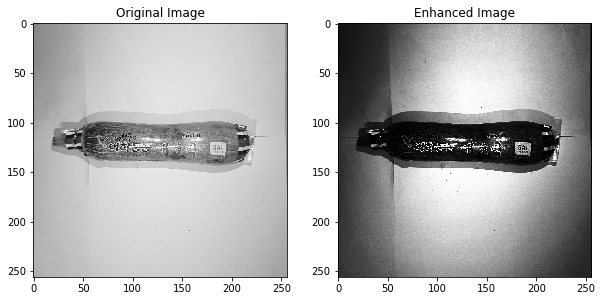

In [55]:
# 이미지 대비를 향상
image_enhanced = cv2.equalizeHist(image)

# plot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_enhanced, cmap='gray')
ax[1].set_title('Enhanced Image')

Text(0.5, 1.0, 'Resized Image')

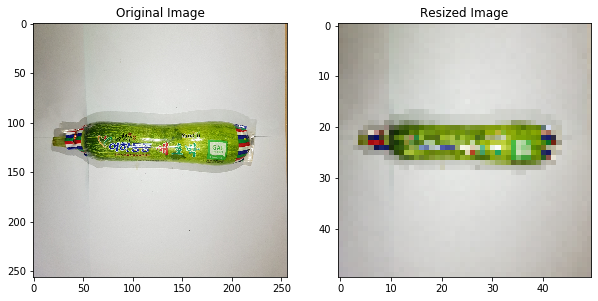

In [58]:
# 이미지 크기를 50x50으로 변경
image_50x50 = cv2.resize(image, (50, 50))

# 출력 
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_50x50, cmap='gray')
ax[1].set_title('Resized Image')

Text(0.5, 1.0, 'Resized Image')

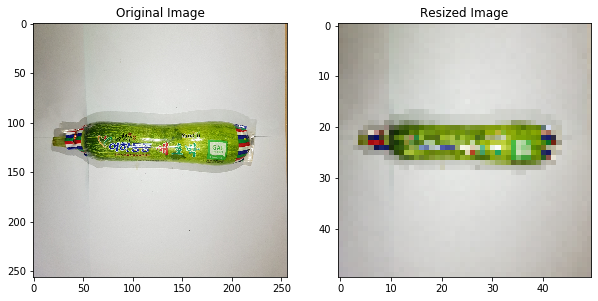

In [69]:
# 이미지 크기를 50x50으로 변경
image_50x50_sharp = cv2.resize(image_rgb, (50, 50))

# RGB타입으로 변환
image_rgb = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2RGB)

# 출력 
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_50x50, cmap='gray')
ax[1].set_title('Resized Image')

In [74]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('C:/Users/no2pe/Desktop/bad_pump.jpg')
image_bgr = cv2.resize(image_bgr,(256,256))
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [75]:
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (0, 56, 256, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[2.79626867e-01, 1.72248230e-01, 2.50424405e-01, 6.63785860e-02,
         2.31321913e-01, 2.19809100e+02, 2.20159931e+02, 2.17863188e+02,
         1.82232753e+02, 1.80309607e+02, 1.73719662e+02, 2.08722542e+02,
         2.08350041e+02, 2.04535196e+02, 1.58879618e+02, 1.52843193e+02,
         1.39412297e+02, 1.96949666e+02, 1.96115419e+02, 1.91340623e+02,
         2.08518262e+01, 2.24543979e+01, 2.18847797e+01, 2.24543979e+01,
         2.47738333e+01, 2.38281601e+01, 2.18847797e+01, 2.38281601e+01,
         2.34453775e+01, 3.78080462e+01, 3.76281871e+01, 4.15982510e+01,
         3.76281871e+01, 5.05034468e+01, 5.19466255e+01, 4.15982510e+01,
         5.19466255e+01, 7.35717837e+01, 1.22419706e+01, 1.46926436e+01,
         1.46009048e+01, 1.46926436e+01, 1.9

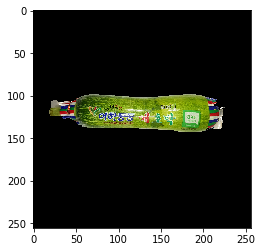

In [76]:
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱해 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()

Text(0.5, 1.0, '64x64 Image')

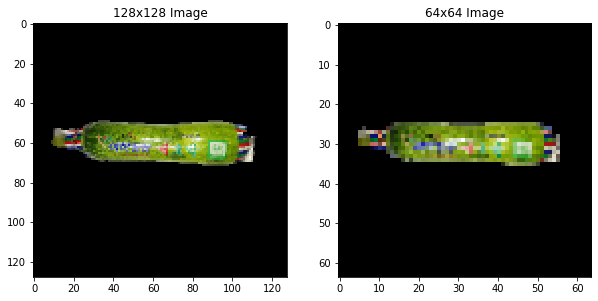

In [77]:
# 이미지 크기 변환
image_128x128 = cv2.resize(image_rgb_nobg, (128, 128))
image_64x64 = cv2.resize(image_rgb_nobg, (64, 64))

# 출력 
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image_128x128, cmap='gray')
ax[0].set_title('128x128 Image')
ax[1].imshow(image_64x64, cmap='gray')
ax[1].set_title('64x64 Image')

In [78]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('C:/Users/no2pe/Desktop/good_pump.jpg')
image_bgr = cv2.resize(image_bgr,(256,256))
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [81]:
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (0, 56, 256, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[1.89386847e-01, 2.06186295e-01, 2.32454203e-01, 1.44870957e-01,
         2.27101698e-01, 1.83959052e+02, 1.81238411e+02, 1.76766160e+02,
         1.95377913e+02, 1.94573338e+02, 1.90856751e+02, 2.06605669e+02,
         2.07560681e+02, 2.03884718e+02, 1.68379466e+02, 1.64626265e+02,
         1.58609438e+02, 2.18987788e+02, 2.19826229e+02, 2.17379434e+02,
         2.02334693e+01, 2.02710253e+01, 1.81572003e+01, 2.02710253e+01,
         2.27624869e+01, 2.26982273e+01, 1.81572003e+01, 2.26982273e+01,
         3.07966386e+01, 1.44144985e+01, 1.23591507e+01, 1.35015311e+01,
         1.23591507e+01, 1.22802624e+01, 1.35581409e+01, 1.35015311e+01,
         1.35581409e+01, 1.78896923e+01, 2.44017644e+01, 2.24869195e+01,
         2.54531347e+01, 2.24869195e+01, 2.3